<a href="https://colab.research.google.com/github/hsreekumar/Data_capstone/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install vaderSentiment
!pip install textblob
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
!pip install sweetviz
import sweetviz as sv

# Enhanced preprocessing with NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 110.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
data = pd.read_csv("Combined_News_DJIA.csv")
RedditNews=pd.read_csv("RedditNews.csv")
upload_DJIA_table=pd.read_csv("upload_DJIA_table.csv")

In [6]:
report = sv.analyze(data)
report.show_html('Combined_News_report.html')
report = sv.analyze(RedditNews)
report.show_html('RedditNews_report.html')
report = sv.analyze(upload_DJIA_table)
report.show_html('upload_DJIA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Combined_News_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report RedditNews_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report upload_DJIA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
example = data.iloc[3,10]
print(example)

b"The commander of a Navy air reconnaissance squadron that provides the President and the defense secretary the airborne ability to command the nation's nuclear weapons has been relieved of duty"


In [75]:
# Preprocess function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.encode('ascii', 'ignore').decode()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]
    return tokens

def remove_leading_b(text):
    return text[1:] if text.startswith('b') else text

# Apply preprocessing
data['Cleaned_Sentence'] = data.apply(
    lambda row: ' '.join(
        preprocess(
            " ".join([remove_leading_b(str(cell)) for cell in row[2:27].fillna('')])
        )
    ),
    axis=1
)
# Print the DataFrame to verify the new column
print(data['Cleaned_Sentence'])

0       georgia down two russian warplane country move...
1       wont america nato help wont help help iraq bus...
2       remember adorable yearold sang opening ceremon...
3       refuse israel weapon attack iran report presid...
4       expert admit legalise drug war south osetia pi...
                              ...                        
1984    barclays rb share suspended trading tanking po...
1985    scientist australia want save great barrier re...
1986    explosion airport istanbul yemeni former presi...
1987    jamaica proposes marijuana dispenser tourist a...
1988    yearold woman mexico city finally received bir...
Name: Cleaned_Sentence, Length: 1989, dtype: object


In [76]:
joined_sentence = data.iloc[3]['Cleaned_Sentence']
sentences = joined_sentence.split(' b')

# Split each sentence into words
words = [sentence.split() for sentence in sentences]

print(f'Sentences: {sentences}')
print(f'Words: {words}')

Sentences: ['refuse israel weapon attack iran report president ordered attack tskhinvali capital south ossetia knew doomed come didnt realize israel clear troop killed reuters cameraman', 'ritain policy tough drug pointless say former civil servant ran cabinet antidrugs unit', 'ody year old found trunk latest ransom paid kidnapping victim mexico head cop quits prez dissolve suspect elite task force china moved million quake survivor prefab home', 'ush announces operation get russia grill yeah end well russian force sink georgian ship commander navy air reconnaissance squadron provides president defense secretary airborne ability command nation nuclear weapon relieved duty cnn reader russia action georgia justified usa send fleet', 'lack sea help georgia send troop humanitarian aid exercise warns israeli plan strike iran nuclear facility intriguing cyberalliance two estonian computer expert heading georgia keep country network running amid intense military confrontation russia cnn effec

In [77]:
model = Word2Vec(words, vector_size=50, window=5, min_count=1, workers=4)

# Calculate Word Embedding Importance
def calculate_word_embeddings_importance(sentences, model):
    word_importance = {}
    for sentence in sentences:
        for word in sentence:
            if word in model.wv:
                word_importance[word] = word_importance.get(word, 0) + 1
    return word_importance

word_embeddings = calculate_word_embeddings_importance(words, model)

print(word_embeddings)

{'refuse': 1, 'israel': 2, 'weapon': 2, 'attack': 2, 'iran': 3, 'report': 1, 'president': 3, 'ordered': 1, 'tskhinvali': 1, 'capital': 1, 'south': 1, 'ossetia': 1, 'knew': 1, 'doomed': 1, 'come': 1, 'didnt': 1, 'realize': 1, 'clear': 1, 'troop': 2, 'killed': 1, 'reuters': 1, 'cameraman': 1, 'ritain': 1, 'policy': 1, 'tough': 1, 'drug': 1, 'pointless': 1, 'say': 2, 'former': 1, 'civil': 1, 'servant': 1, 'ran': 1, 'cabinet': 1, 'antidrugs': 1, 'unit': 1, 'ody': 1, 'year': 1, 'old': 1, 'found': 1, 'trunk': 1, 'latest': 1, 'ransom': 1, 'paid': 1, 'kidnapping': 1, 'victim': 1, 'mexico': 1, 'head': 3, 'cop': 1, 'quits': 1, 'prez': 1, 'dissolve': 1, 'suspect': 1, 'elite': 1, 'task': 1, 'force': 3, 'china': 1, 'moved': 1, 'million': 1, 'quake': 1, 'survivor': 1, 'prefab': 1, 'home': 1, 'ush': 1, 'announces': 1, 'operation': 1, 'get': 1, 'russia': 7, 'grill': 1, 'yeah': 1, 'end': 1, 'well': 1, 'russian': 4, 'sink': 1, 'georgian': 2, 'ship': 1, 'commander': 1, 'navy': 1, 'air': 1, 'reconnaissanc

In [78]:

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(sentences)
word_tfidf = dict(zip(vectorizer_tfidf.get_feature_names_out(), X_tfidf.toarray().sum(axis=0)))

print(word_tfidf)

{'ability': 0.16516344535907618, 'accuses': 0.22897031949007554, 'action': 0.16516344535907618, 'agreement': 0.4712248263552398, 'aid': 0.09436787794934769, 'air': 0.16516344535907618, 'airborne': 0.16516344535907618, 'airport': 0.22897031949007554, 'aleksander': 0.22897031949007554, 'amid': 0.09436787794934769, 'announces': 0.16516344535907618, 'antidrugs': 0.280727897377591, 'attack': 0.3879981356656043, 'cabinet': 0.280727897377591, 'came': 0.09436787794934769, 'cameraman': 0.19399906783280216, 'capital': 0.19399906783280216, 'ceasefire': 0.4712248263552398, 'china': 0.19539422738405612, 'choice': 0.09436787794934769, 'civil': 0.280727897377591, 'clear': 0.19399906783280216, 'cnn': 0.2154332867135923, 'come': 0.19399906783280216, 'command': 0.16516344535907618, 'commander': 0.16516344535907618, 'computer': 0.09436787794934769, 'conflict': 0.22897031949007554, 'confrontation': 0.09436787794934769, 'control': 0.22897031949007554, 'convoy': 0.09436787794934769, 'cop': 0.195394227384056

In [79]:
# Bag-of-Words (BoW)
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(sentences)
word_bow = dict(zip(vectorizer_bow.get_feature_names_out(), X_bow.toarray().sum(axis=0)))

print(word_bow)

{'ability': 1, 'accuses': 1, 'action': 1, 'agreement': 1, 'aid': 1, 'air': 1, 'airborne': 1, 'airport': 1, 'aleksander': 1, 'amid': 1, 'announces': 1, 'antidrugs': 1, 'attack': 2, 'cabinet': 1, 'came': 1, 'cameraman': 1, 'capital': 1, 'ceasefire': 1, 'china': 1, 'choice': 1, 'civil': 1, 'clear': 1, 'cnn': 2, 'come': 1, 'command': 1, 'commander': 1, 'computer': 1, 'conflict': 1, 'confrontation': 1, 'control': 1, 'convoy': 1, 'cop': 1, 'country': 1, 'cyberalliance': 1, 'ddos': 1, 'defence': 1, 'defense': 1, 'denies': 1, 'didnt': 1, 'dissolve': 1, 'doomed': 1, 'drug': 1, 'duty': 1, 'effect': 1, 'elephant': 1, 'elite': 1, 'encircling': 1, 'end': 1, 'estonian': 1, 'exercise': 1, 'expert': 1, 'extinct': 1, 'facility': 1, 'fleet': 1, 'force': 3, 'former': 1, 'found': 1, 'georgia': 8, 'georgian': 2, 'get': 1, 'gorbachev': 1, 'grill': 1, 'head': 3, 'heading': 1, 'help': 1, 'hit': 1, 'home': 1, 'humanitarian': 2, 'information': 1, 'intense': 1, 'intriguing': 1, 'iran': 3, 'israel': 2, 'israeli':

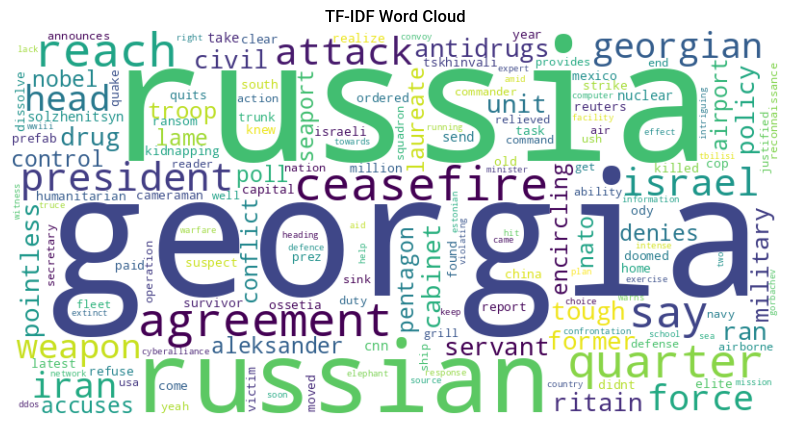

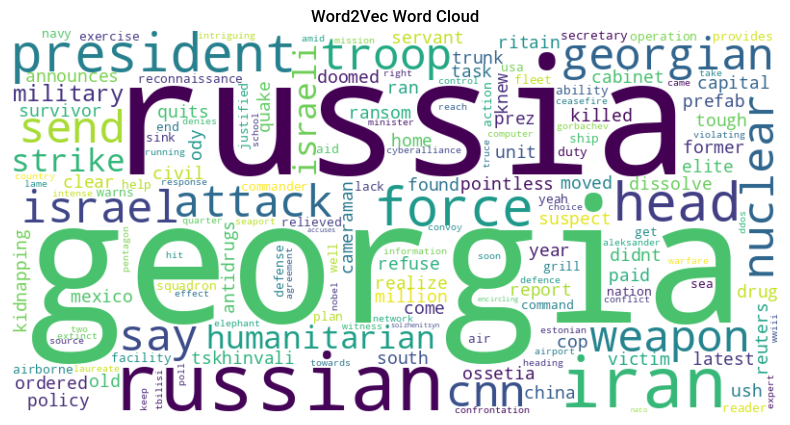

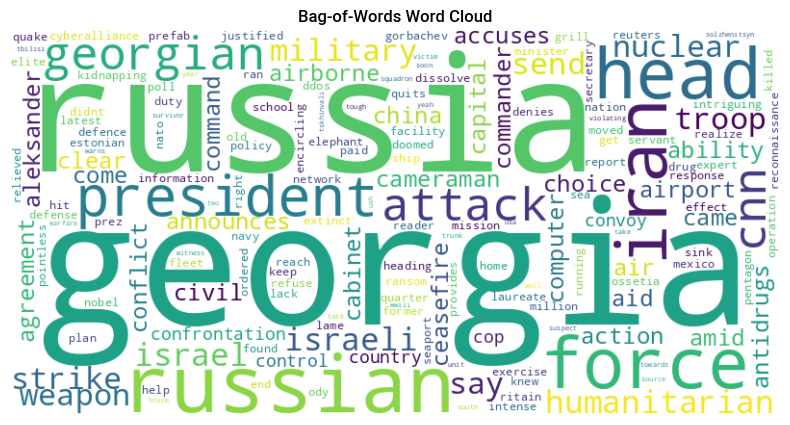

In [80]:
# Create Word Clouds
def create_wordcloud(word_importance, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importance)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

create_wordcloud(word_tfidf, 'TF-IDF Word Cloud')
print('\n\n')
create_wordcloud(word_embeddings, 'Word2Vec Word Cloud')
print('\n\n')
create_wordcloud(word_bow, 'Bag-of-Words Word Cloud')

print('\n\n')



In [81]:
# Compare Results
df_tfidf = pd.DataFrame(list(word_tfidf.items()), columns=['Word', 'TF-IDF']).set_index('Word')
df_embeddings = pd.DataFrame(list(word_embeddings.items()), columns=['Word', 'Word2Vec']).set_index('Word')
df_bow = pd.DataFrame(list(word_bow.items()), columns=['Word', 'Bag-of-Words']).set_index('Word')

df_combined = df_tfidf.join(df_embeddings, how='outer').join(df_bow, how='outer').fillna(0)


df_sorted_by_tfidf = df_combined.sort_values(by='TF-IDF', ascending=False)
df_sorted_by_embeddings = df_combined.sort_values(by='Word2Vec', ascending=False)
df_sorted_by_bow = df_combined.sort_values(by='Bag-of-Words', ascending=False)

# Use the sorted DataFrames
print("DataFrame sorted by TF-IDF:")
print(df_sorted_by_tfidf)

print("\nDataFrame sorted by Word2Vec:")
print(df_sorted_by_embeddings)

print("\nDataFrame sorted by Bag-of-Words:")
print(df_sorted_by_bow)

DataFrame sorted by TF-IDF:
             TF-IDF  Word2Vec  Bag-of-Words
Word                                       
georgia    0.685434         8             8
russia     0.664665         7             7
russian    0.585450         4             4
quarter    0.471225         1             1
ceasefire  0.471225         1             1
...             ...       ...           ...
country    0.094368         1             1
tbilisi    0.094368         1             1
towards    0.094368         1             1
aid        0.094368         1             1
violating  0.094368         1             1

[169 rows x 3 columns]

DataFrame sorted by Word2Vec:
             TF-IDF  Word2Vec  Bag-of-Words
Word                                       
georgia    0.685434         8             8
russia     0.664665         7             7
russian    0.585450         4             4
president  0.417298         3             3
iran       0.317703         3             3
...             ...       ...        

In [85]:
merge=data.merge(upload_DJIA_table,how="inner",on="Date")
print(merge.head(3))

         Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   
2           b"Russia 'ends Georgia operation'"   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   

                                                

In [90]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'




merge['Subjectivity'] = merge['Cleaned_Sentence'].apply(get_subjectivity)
merge['Polarity'] = merge['Cleaned_Sentence'].apply(get_polarity)
merge['Sentiment'] = merge['Polarity'].apply(get_sentiment)

print(merge.head(3))

         Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   
2           b"Russia 'ends Georgia operation'"   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   

                                                

In [91]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment


compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(merge['Cleaned_Sentence'])):
    SIA= getSIA(merge['Cleaned_Sentence'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

merge['compound']= compound
merge['neg']= neg
merge['pos']=pos
merge['neu']=neu
print(merge.head(3))

         Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   
2           b"Russia 'ends Georgia operation'"   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   

                                                